In [6]:
import pandas as pd

# Load the dataset
file_path = 'bankPortfolios.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

       2699     6107      9965      1036       2924      3786      4573  \
0  759920.0   6480.0  588660.0  528110.0  1188700.0  169400.0  174890.0   
1  129080.0    729.0   72972.0    3310.0    73909.0      34.0   44928.0   
2   57828.0   1449.8   27634.0    1739.0    39274.0    1838.3    9854.0   
3    1021.0  14222.0    3186.0      35.0     4776.0   29645.0    9295.0   
4  149560.0  93281.0  211800.0    7950.0   151300.0   16933.0   32142.0   

      1087     617    76.827       769    1828.2      381      933      32673  \
0  10210.0  6566.0  21101.00  211210.0  428740.0  82487.0  68882.0  3770300.0   
1  32995.0   409.0    502.00   15599.0   57902.0  20800.0  12168.0   423250.0   
2   1900.0   321.0    228.98    2291.9    7696.0   4609.0   7823.0   145830.0   
3   3245.0   493.0    215.00    4932.0   20818.0    891.0   3661.0    87600.0   
4   2020.0   880.0   3106.00   17057.0  137950.0  12992.0  22517.0   792090.0   

   1  
0  1  
1  1  
2  1  
3  1  
4  1  


In [7]:
# Basic structure
print(f"Dataset shape: {data.shape}")

# Data types of the columns
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

Dataset shape: (7782, 16)
2699      float64
6107      float64
9965      float64
1036      float64
2924      float64
3786      float64
4573      float64
1087      float64
617       float64
76.827    float64
769       float64
1828.2    float64
381       float64
933       float64
32673     float64
1           int64
dtype: object
2699      0
6107      0
9965      0
1036      0
2924      0
3786      0
4573      0
1087      0
617       0
76.827    0
769       0
1828.2    0
381       0
933       0
32673     0
1         0
dtype: int64


In [8]:
# Statistical summary
print(data.describe())

               2699          6107          9965          1036          2924  \
count  7.782000e+03  7.782000e+03  7.782000e+03  7.782000e+03  7.782000e+03   
mean   9.954587e+04  3.180844e+04  3.930404e+05  2.378620e+04  1.586130e+05   
std    1.053948e+06  6.457662e+05  9.295623e+06  3.699858e+05  1.771342e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.449675e+03  8.600675e+02  6.524500e+03  3.900000e+02  4.840750e+03   
50%    6.954000e+03  2.903000e+03  1.893700e+04  1.351200e+03  1.869200e+04   
75%    2.994025e+04  8.127825e+03  5.038650e+04  4.924500e+03  5.693600e+04   
max    4.484800e+07  3.951900e+07  4.917600e+08  2.075700e+07  7.565400e+07   

               3786          4573          1087           617        76.827  \
count  7.782000e+03  7.782000e+03  7.782000e+03  7.782000e+03  7.782000e+03   
mean   2.882314e+04  2.062881e+05  1.736739e+05  3.633997e+04  1.268113e+04   
std    5.050950e+05  3.940249e+06  4.403477e+06  1.

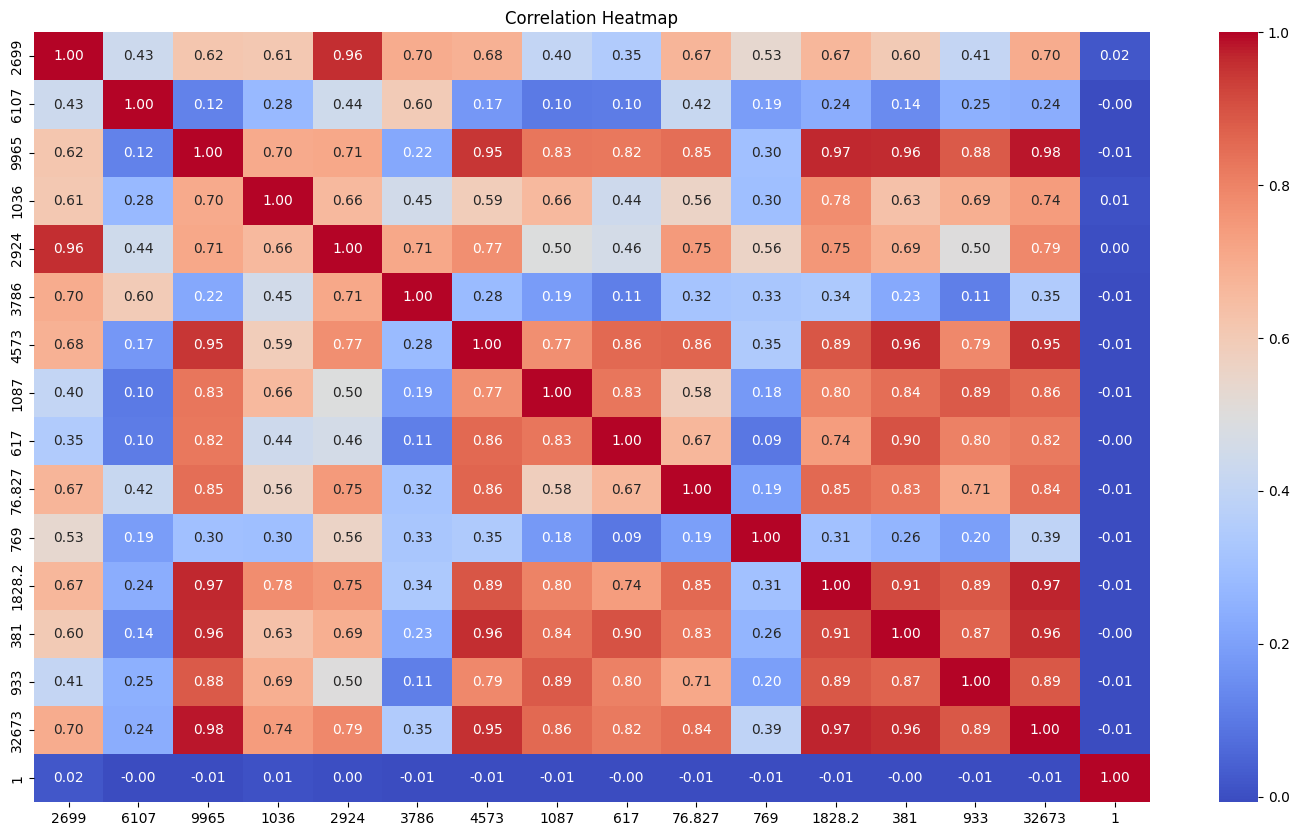

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



CHECKING THE BALANCE OF THE DATASET 

In [10]:
# Check the balance of the dataset
class_counts = data['1'].value_counts(normalize=True) * 100

print("Class Distribution (%):")
print(class_counts)

Class Distribution (%):
1
0    96.080699
1     3.919301
Name: proportion, dtype: float64


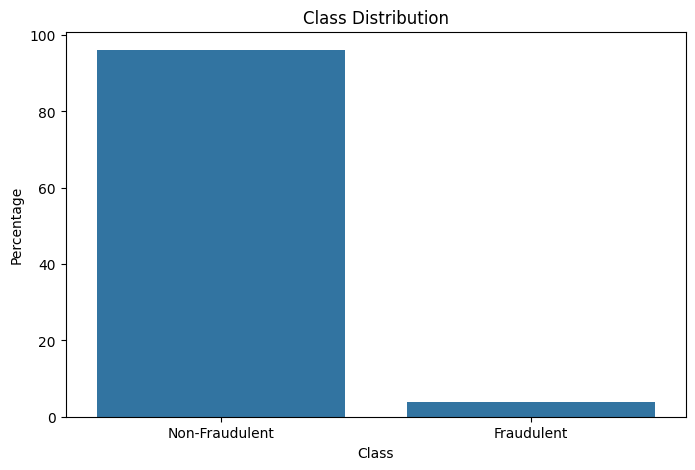

In [11]:
# Visualizing the class imbalance
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(range(len(class_counts.index)), ['Non-Fraudulent', 'Fraudulent'])
plt.show()

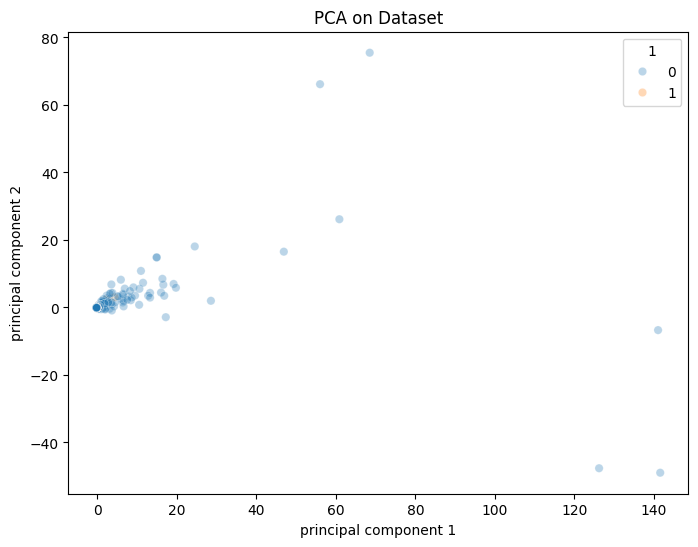

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
features = data.select_dtypes(include=['float64', 'int64']).columns.drop('1')
x = StandardScaler().fit_transform(data[features])

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue=data['1'], alpha=0.3)
plt.title('PCA on Dataset')
plt.show()